In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd


df = pd.read_fwf('/content/gdrive/My Drive/data/brain_2_body/brain_body.txt')
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [0]:
n = 62
x = df[['Brain']]
y = df[['Body']]

In [0]:
def predict(df, n, x_input):
  sum_xy = 0
  sum_x2 = 0

  x = df.iloc[:,0]
  y = df.iloc[:,1]
  for row in df.iterrows():
    sum_x2 += float(row[1][0]) * float(row[1][0])
    sum_xy += float(row[1][0]) * float(row[1][1])

  x = float(x.sum())
  y = float(y.sum())
  sum_x_2 = float(x * x)
  m = ((n * sum_xy) - (x * y)) / ((n * sum_x2) - sum_x_2)
  c = (y - (m * x)) / n
  
  return ((m * x_input) + c)

In [0]:
x_input = float(input())
print(predict(df, 62, x_input))

465
540.4252071751546


In [0]:
df_1 = pd.read_csv('/content/gdrive/My Drive/data/brain_2_body/challenge_dataset.txt')
df_1.head()


,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [0]:
x_input = float(input())
print(predict(df_1, 96, x_input))

6.1101
3.2033910706813726


## Gradient Descent

In [0]:
def compute_error_of_given_points(c, m, points):
    totalError = 0

    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + c)) ** 2
    
    return totalError / float(len(points))


In [0]:
def step_gradient(current_c, current_m, points, learning_rate):
    # gradient descent
    c_gradient = 0
    m_gradient = 0
    N = float(len(points))

    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        c_gradient += -(2 / N) * (y - ((current_m * x) + current_c))
        m_gradient += -(2 / N) * x * (y - ((current_m * x) + current_c))
    
    new_c = current_c - (learning_rate * c_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return [new_c, new_m]

In [0]:
def gradient_descent_runner(points, starting_c, starting_m, learning_rate, num_iterations):
    c = starting_c
    m = starting_m
            
    plt.scatter(points[:, 0], points[:, 1])
    for i in range(num_iterations):
        c, m = step_gradient(c, m, array(points), learning_rate)
        plt.plot(points[:, 0], m * (points[:, 0]) + c)

    return [c, m]


In [0]:
from numpy import *
import matplotlib.pyplot as plt
def run(x):
    learning_rate = 0.0001      # hyperparameters
    # y = mx + c
    initial_c = 0
    initial_m = 0
    num_iterations = 1000
    [c, m] = gradient_descent_runner(points, initial_c, initial_m, learning_rate, num_iterations)


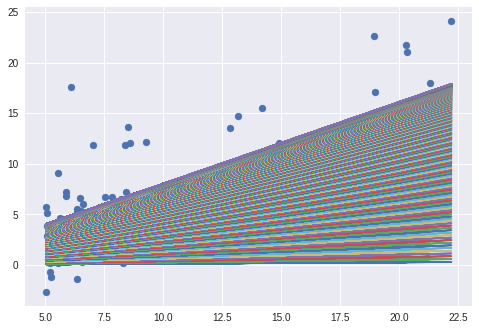

In [0]:
points = genfromtxt('/content/gdrive/My Drive/data/brain_2_body/challenge_dataset.txt', delimiter=',')
run(6.1101)
plt.show()